# Equity ERC


In [31]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Data



In [40]:
start_date = '2016-01-01'
end_date = '2025-10-31'

sp500_tickers = ['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM','ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APO', 'APP', 'APTV', 'ARE', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BK', 'BKNG', 'BLK', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CCL', 'CDNS', 'CDW', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COIN', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CRWD', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTRA', 'CTSH', 'CVS', 'CVX', 'D', 'DAL', 'DASH', 'DD', 'DE', 'DECK', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOV', 'DOW', 'DPZ', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EG', 'EIX', 'EL', 'ELV', 'EME',  'EMN', 'EMR', 'EOG', 'EPAM', 'EQIX', 'EQT', 'ERJ', 'ES', 'ESS', 'ETN',  'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FIS', 'FITB', 'FMC', 'FOX', 'FOXA', 'FRT', 'FSLR', 'FTNT', 'FTV', 'GD', 'GE', 'GEHC', 'GEV', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC',
    'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HOOD', 'HPE', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUBB', 'HUM', 'HWM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF',  'ILMN', 'INCY', 'INTC', 'INTU', 'INVH', 'IP', 'IPG', 'IQV', 'IR', 'IRM',  'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBL', 'JCI', 'JKHY', 'JNJ', 'JPM', 'K', 'KDP', 'KHC', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KVUE', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNT', 'LOW', 'LRCX', 'LULU', 'LUV', 'LVS', 'LW', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOH',  'MOS', 'MPC', 'MPWR', 'MRK', 'MRNA', 'MS', 'MSCI', 'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX',  'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OTIS', 'OXY', 'PANW', 'PAYC', 'PAYX', 'PCAR', 'PCG',
    'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PLTR', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'PPG', 'PPL', 'PRU', 'PSX', 'PTC', 'PWR', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBUX', 'SCHW', 'SHW', 'SJM', 'SLB', 'SMCI', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SWK', 'SWKS',  'SYF', 'SYK', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC',  'TFX', 'TGT', 'TJX', 'TKO', 'TMUS', 'TMO', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TT', 'TTWO', 'TXN', 'TXT', 'UAL', 'UBER', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VEEV', 'VLO', 'VLTO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VST', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBD', 'WCN', 'WDC', 'WEC', 'WELL', 'WFC', 'WM', 'WMB', 'WMT', 'WRB', 'WST', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM',
    'ZBH', 'ZBRA', 'ZTS' ]

equity_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Close']

/tmp/ipython-input-2601189995.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  equity_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  475 of 475 completed


In [41]:
equity_data

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,37.636375,39.095455,23.776182,38.010929,NaN,35.559444,86.944168,91.970001,44.832024,26.820847,...,20.386570,60.666759,26.422338,50.422520,51.609356,32.004807,43.276863,91.369102,66.489998,43.701633
2016-01-05,37.506878,38.722755,23.180363,37.852562,NaN,35.551167,87.396706,92.339996,44.502621,27.120186,...,20.434402,61.813580,26.688778,50.852165,52.661526,31.995937,43.168983,93.271698,64.820000,44.385765
2016-01-06,37.673363,39.401268,22.726730,37.859165,NaN,35.252956,87.225929,91.019997,42.608540,26.461637,...,19.983341,58.611332,26.970030,50.429031,51.898697,31.596771,42.863342,93.675552,62.230000,44.395012
2016-01-07,36.073200,38.655861,21.767555,37.747005,NaN,34.408085,84.664505,89.110001,41.521496,25.833025,...,19.245245,53.097755,27.073647,49.621872,51.442753,30.780664,41.400990,91.521660,59.410000,43.045238
2016-01-08,35.693958,38.579407,21.882664,36.717720,NaN,33.687443,83.844849,87.849998,41.159157,25.735743,...,19.067562,50.936443,26.777592,48.619404,49.969704,30.487951,40.837631,91.135773,59.250000,42.416580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-24,148.029999,13.780000,262.820007,227.990005,127.989998,126.849998,247.649994,353.519989,238.009995,63.330002,...,23.889999,125.570000,80.389999,115.389999,13.110000,148.250000,143.360001,103.029999,308.820007,145.433609
2025-10-27,146.589996,13.410000,268.809998,228.029999,129.070007,127.180000,250.770004,357.799988,243.009995,61.939999,...,24.020000,125.440002,80.690002,115.940002,13.090000,149.399994,142.979996,103.120003,310.570007,147.018097
2025-10-28,145.850006,12.710000,269.000000,227.539993,128.009995,126.610001,253.350006,359.910004,239.350006,61.369999,...,23.740000,120.849998,79.820000,115.029999,13.070000,150.500000,141.089996,101.139999,274.309998,144.905457


In [58]:
commodity_tickers = [
    # Energy
    'CL=F',  # WTI Crude Oil
    'BZ=F',  # Brent Crude Oil
    'NG=F',  # Natural Gas
    'HO=F',  # Heating Oil
    'RB=F',  # RBOB Gasoline

    # Precious Metals
    'GC=F',  # Gold
    'SI=F',  # Silver
    'PL=F',  # Platinum
    'PA=F',  # Palladium

    # Industrial Metals
    'HG=F',  # Copper
    'ALI=F', # Aluminum
    'TIO=F', # Iron Ore

    # Agriculture
    'ZC=F',  # Corn
    'ZS=F',  # Soybeans
    'ZW=F',  # Wheat

    # Softs
    'KC=F',  # Coffee
    'SB=F',  # Sugar
    'CC=F',  # Cocoa
    'CT=F',  # Cotton
    'OJ=F',  # Frozen Concentrated Orange Juice

    # Livestock
    'LE=F',  # Live Cattle
    'HE=F',  # Lean Hogs
    'GF=F',  # Feeder Cattle
     ]

commodity_data = yf.download(commodity_tickers, start=start_date, end=end_date)['Close']

/tmp/ipython-input-3522437167.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  commodity_data = yf.download(commodity_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  23 of 23 completed


In [78]:
commodity_data

Ticker,ALI=F,BZ=F,CC=F,CL=F,CT=F,GC=F,GF=F,HE=F,HG=F,HO=F,...,OJ=F,PA=F,PL=F,RB=F,SB=F,SI=F,TIO=F,ZC=F,ZS=F,ZW=F
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1601.50,37.220001,3124.0,36.759998,62.610001,1075.099976,167.625000,59.424999,2.0705,1.1264,...,143.600006,542.950012,883.200012,1.2907,14.97,13.817000,41.950001,351.50,864.50,458.25
2016-01-05,1593.25,36.419998,3059.0,35.970001,62.680000,1078.400024,167.774994,61.099998,2.0885,1.1253,...,142.100006,535.099976,888.599976,1.2567,14.57,13.949000,41.689999,353.00,867.75,461.25
2016-01-06,1607.00,34.230000,2981.0,33.970001,62.000000,1091.900024,168.324997,60.825001,2.0805,1.0807,...,143.050003,505.049988,873.700012,1.1618,14.42,13.957000,41.119999,353.25,875.75,462.75
2016-01-07,1607.75,33.750000,2963.0,33.270000,61.430000,1107.699951,163.824997,59.549999,2.0155,1.0656,...,137.649994,493.000000,876.400024,1.1460,14.75,14.335000,41.139999,353.00,877.00,468.50
2016-01-08,1624.50,33.549999,3017.0,33.160000,61.400002,1097.800049,159.425003,59.849998,2.0165,1.0521,...,130.850006,493.600006,877.099976,1.1277,14.46,13.908000,41.060001,357.00,879.50,478.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-24,2776.75,65.940002,6319.0,61.500000,64.199997,4118.399902,354.299988,81.900002,5.0935,2.4031,...,193.300003,1463.599976,1593.900024,1.9227,14.97,48.376999,105.410004,423.25,1041.75,512.50
2025-10-27,2800.25,65.620003,6182.0,61.310001,64.559998,4001.899902,345.500000,81.500000,5.1405,2.4361,...,193.699997,1415.900024,1578.400024,1.9204,14.46,46.562000,105.570000,428.75,1067.25,526.00
2025-10-28,2821.50,64.400002,6002.0,60.150002,65.050003,3966.199951,344.100006,80.824997,5.1405,2.3872,...,184.250000,1402.699951,1577.000000,1.9252,14.37,47.125000,105.559998,432.00,1078.25,529.00


In [94]:
crypto_tickers = [
    # --- Top Tier (High Market Cap & Volume) ---
    'BTC-USD',   # Bitcoin
    'ETH-USD',   # Ethereum
    'BNB-USD',   # BNB (Binance Coin)
    'SOL-USD',   # Solana
    'XRP-USD',   # XRP
    'DOGE-USD',  # Dogecoin
    'ADA-USD',   # Cardano
    'AVAX-USD',  # Avalanche
    'DOT-USD',   # Polkadot
    'LINK-USD',  # Chainlink

    # --- Other High-Volume/Major Ecosystem Coins ---
    'TRX-USD',   # TRON
    'LTC-USD',   # Litecoin
    'BCH-USD',   # Bitcoin Cash
    'XLM-USD',   # Stellar
    'SHIB-USD',  # Shiba Inu
    'TON-USD',   # Toncoin
    'ICP-USD',   # Internet Computer
    'NEAR-USD',  # NEAR Protocol
    'XMR-USD',   # Monero
    'VET-USD',   # VeChain
    'ATOM-USD',  # Cosmos
    'DASH-USD',  # Dash
    'ZEC-USD',   # Zcash


    # --- DeFi, Gaming, and Web3 Majors ---
    'AAVE-USD',  # Aave
    'FIL-USD',   # Filecoin
    'ETC-USD',   # Ethereum Classic
]

crypto_data = yf.download(crypto_tickers, start=start_date, end=end_date)['Close']

/tmp/ipython-input-4180144788.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  crypto_data = yf.download(crypto_tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  26 of 26 completed


In [95]:
crypto_data

Ticker,AAVE-USD,ADA-USD,ATOM-USD,AVAX-USD,BCH-USD,BNB-USD,BTC-USD,DASH-USD,DOGE-USD,DOT-USD,...,NEAR-USD,SHIB-USD,SOL-USD,TON-USD,TRX-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD,ZEC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,434.334015,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,433.437988,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,430.010986,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,433.091003,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,431.959991,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-26,240.679688,0.681063,3.256401,20.835848,558.702759,1137.586914,114472.445312,49.783127,0.205670,3.196015,...,2.368695,0.000011,200.028625,0.011792,0.300447,0.017901,0.330670,348.162018,2.645146,326.573273
2025-10-27,235.234680,0.667365,3.179068,20.326380,555.938721,1139.745972,114119.328125,48.617016,0.200382,3.140187,...,2.330398,0.000010,198.741714,0.012544,0.298356,0.017282,0.322962,340.693481,2.634630,341.611298
2025-10-28,228.475372,0.646273,3.101052,19.493608,557.836243,1103.144775,112956.164062,45.807400,0.193757,3.053065,...,2.236660,0.000010,194.442795,0.012286,0.295648,0.016776,0.318580,335.296448,2.605977,315.874146


## Optimization

In [67]:
def dailyreturns (dailyprice) :
    # Calculate daily returns
    daily_returns = dailyprice.pct_change(fill_method='ffill')

    # Drop first line
    daily_returns = daily_returns.iloc[1:]

    # Convert the index to datetime objects
    daily_returns.index = pd.to_datetime(daily_returns.index)


    return daily_returns

In [97]:
equity_returns = dailyreturns(equity_data)
commodity_returns = dailyreturns(commodity_data)
crypto_returns = dailyreturns(crypto_data)

/tmp/ipython-input-1150541521.py:3: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = dailyprice.pct_change(fill_method='ffill')
/tmp/ipython-input-1150541521.py:3: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = dailyprice.pct_change(fill_method='ffill')
/tmp/ipython-input-1150541521.py:3: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior

In [22]:

# Define a function to calculate the portfolio risk (standard deviation)
def portfolio_risk(weights, cov_matrix):

    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Define a function to calculate the risk contribution of each asset in the portfolio
def risk_contribution(weights, cov_matrix):

    portfolio_std = portfolio_risk(weights, cov_matrix)
    # Marginal contribution to risk
    marginal_contribution = np.dot(cov_matrix, weights) / portfolio_std
    # Risk contribution
    risk_contrib = weights * marginal_contribution
    return risk_contrib

# Define a function to minimize, which aims to equalize the risk contributions
def objective_function(weights, cov_matrix):

    risk_contribs = risk_contribution(weights, cov_matrix)
    # We want all risk contributions to be equal, so minimize the sum of squared differences
    # from the average risk contribution.
    return np.sum((risk_contribs - np.mean(risk_contribs))**2)*1000

In [23]:
def erc_portfolio(returns):

    # store cumulative returns for each year
    portfolio_returns_by_year = []

    # Iterate through the years from 2016 to 2025
    for year in range(2016, 2025):
        print(f"Calculating ERC portfolio for {year}...")

        # Filter data for the current year
        daily_returns_year = returns.loc[returns.index.year == year]

        # Drop columns with any NaN values in this year
        daily_returns_year = daily_returns_year.dropna(axis=1)

        # Store the column names for the current year
        columns = daily_returns_year.columns

        covariance_matrix_year = daily_returns_year.cov()

        # Calculate ERC weights for the current year
        num_assets_year = len(covariance_matrix_year.columns)
        initial_weights_year = np.array(num_assets_year * [1. / num_assets_year])

        constraints_year = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
        bounds_year = tuple((0, 1) for asset in range(num_assets_year))
        options = {'ftol': 1e-10, 'maxiter': 1000}


        result_year = minimize(objective_function, initial_weights_year, args=(covariance_matrix_year,),
                                  method='SLSQP', bounds=bounds_year, constraints=constraints_year,
                                  options=options, tol=1e-10)

        erc_weights_year = result_year.x

        #Calculate the daily portfolio returns for the current year using the weights
        daily_returns_expost = returns.loc[returns.index.year == year+1]
        daily_returns_expost = daily_returns_expost[daily_returns_expost.columns.intersection(columns)]

        weights = erc_weights_year
        year_port_daily_returns = []

        for t in range(len(daily_returns_expost)):
            # Calculate portfolio return for the current day
            portfolio_return = np.dot(weights, daily_returns_expost.iloc[t])

            year_port_daily_returns.append(portfolio_return)

            # Adjust weights for the next day (if it's not the last day)
            if t < len(daily_returns_expost)-1:
                weights_numerator = weights * (1 + daily_returns_expost.iloc[t])
                weights = weights_numerator / (1 + portfolio_return)

        # Check the risk contributions for the optimized ERC weights
        erc_risk_contributions = risk_contribution(erc_weights_year, covariance_matrix_year)
        pd.set_option('display.float_format', '{:.10f}'.format)
        erc_risk_contributions_df = pd.DataFrame({'Risk Contribution': erc_risk_contributions}, index=covariance_matrix_year.columns)
        display(erc_risk_contributions_df)
        pd.reset_option('display.float_format')


        portfolio_returns_by_year.append(year_port_daily_returns)

    return portfolio_returns_by_year


In [99]:
equity_erc_portfolio = erc_portfolio(equity_returns)
commodity_erc_portfolio = erc_portfolio(commodity_returns)
crypto_erc_portfolio = erc_portfolio(crypto_returns)

Calculating ERC portfolio for 2016...


,Risk Contribution
Ticker,
A,0.0000174231
AAL,0.0000174277
AAPL,0.0000174555
ABBV,0.0000174427
ABT,0.0000174263
...,...
XYL,0.0000174301
YUM,0.0000174285
ZBH,0.0000174557


Calculating ERC portfolio for 2017...


,Risk Contribution
Ticker,
A,0.0000084663
AAL,0.0000085070
AAPL,0.0000084753
ABBV,0.0000084349
ABT,0.0000084874
...,...
XYL,0.0000084904
YUM,0.0000084457
ZBH,0.0000084780


Calculating ERC portfolio for 2018...


,Risk Contribution
Ticker,
A,0.0000188826
AAL,0.0000188674
AAPL,0.0000188859
ABBV,0.0000188787
ABT,0.0000189038
...,...
XYL,0.0000189010
YUM,0.0000188927
ZBH,0.0000188809


Calculating ERC portfolio for 2019...


,Risk Contribution
Ticker,
A,0.0000142991
AAL,0.0000142733
AAPL,0.0000142720
ABBV,0.0000143035
ABT,0.0000142766
...,...
XYL,0.0000142833
YUM,0.0000142771
ZBH,0.0000143056


Calculating ERC portfolio for 2020...


,Risk Contribution
Ticker,
A,0.0000453699
AAL,0.0000453725
AAPL,0.0000453802
ABBV,0.0000453677
ABT,0.0000453623
...,...
XYL,0.0000453785
YUM,0.0000453809
ZBH,0.0000453798


Calculating ERC portfolio for 2021...


,Risk Contribution
Ticker,
A,0.0000152912
AAL,0.0000153042
AAPL,0.0000152996
ABBV,0.0000153158
ABNB,0.0000153015
...,...
XYL,0.0000153088
YUM,0.0000153228
ZBH,0.0000152998


Calculating ERC portfolio for 2022...


,Risk Contribution
Ticker,
A,0.0000273161
AAL,0.0000273245
AAPL,0.0000273268
ABBV,0.0000272650
ABNB,0.0000273238
...,...
XYL,0.0000273195
YUM,0.0000273424
ZBH,0.0000273223


Calculating ERC portfolio for 2023...


,Risk Contribution
Ticker,
A,0.0000160156
AAL,0.0000159947
AAPL,0.0000160220
ABBV,0.0000159910
ABNB,0.0000160355
...,...
XYL,0.0000160023
YUM,0.0000159849
ZBH,0.0000159925


Calculating ERC portfolio for 2024...


,Risk Contribution
Ticker,
A,0.0000128514
AAL,0.0000128171
AAPL,0.0000128549
ABBV,0.0000128272
ABNB,0.0000128545
...,...
XYL,0.0000128584
YUM,0.0000128620
ZBH,0.0000128396


Calculating ERC portfolio for 2016...


,Risk Contribution
Ticker,
ALI=F,0.0002425979
BZ=F,0.0002425649
CC=F,0.0002424666
CL=F,0.0002426895
CT=F,0.0002425385
GC=F,0.0002425759
GF=F,0.0002428688
HE=F,0.0002426855
HG=F,0.0002426715


Calculating ERC portfolio for 2017...


,Risk Contribution
Ticker,
ALI=F,0.0002020254
BZ=F,0.0002020703
CC=F,0.0002021049
CL=F,0.0002021133
CT=F,0.0002019665
GC=F,0.0002022031
GF=F,0.0002020346
HE=F,0.0002019649
HG=F,0.0002021679


Calculating ERC portfolio for 2018...


,Risk Contribution
Ticker,
ALI=F,0.0001255012
BZ=F,0.0001059474
CC=F,0.0001043211
CL=F,0.0001054952
CT=F,0.0001063732
GC=F,0.0001067632
GF=F,0.0001090250
HE=F,0.0001069532
HG=F,0.0001054432


Calculating ERC portfolio for 2019...


,Risk Contribution
Ticker,
ALI=F,0.0002012803
BZ=F,0.0002012327
CC=F,0.0002012250
CL=F,0.0002014190
CT=F,0.0002012254
GC=F,0.0002012966
GF=F,0.0002012443
HE=F,0.0002012891
HG=F,0.0002014906


Calculating ERC portfolio for 2020...


,Risk Contribution
Ticker,
ALI=F,0.0003657464
BZ=F,0.0003658162
CC=F,0.0003657427
CL=F,0.0003659053
CT=F,0.0003656772
GC=F,0.0003655858
GF=F,0.0003658419
HE=F,0.0003658760
HG=F,0.0003657297


Calculating ERC portfolio for 2021...


,Risk Contribution
Ticker,
ALI=F,0.0002880884
BZ=F,0.0002881813
CC=F,0.0002882405
CL=F,0.0002882776
CT=F,0.0002882384
GC=F,0.0002881665
GF=F,0.0002882309
HE=F,0.0002881525
HG=F,0.0002881515


Calculating ERC portfolio for 2022...


,Risk Contribution
Ticker,
ALI=F,0.0003291371
BZ=F,0.0003291088
CC=F,0.0003291481
CL=F,0.0003291042
CT=F,0.0003290786
GC=F,0.0003290865
GF=F,0.0003291035
HE=F,0.0003290098
HG=F,0.0003290841


Calculating ERC portfolio for 2023...


,Risk Contribution
Ticker,
ALI=F,0.0002625307
BZ=F,0.0002625808
CC=F,0.0002625906
CL=F,0.0002625399
CT=F,0.0002624161
GC=F,0.0002624703
GF=F,0.0002624605
HE=F,0.0002624944
HG=F,0.0002626217


Calculating ERC portfolio for 2024...


,Risk Contribution
Ticker,
ALI=F,0.0002411040
BZ=F,0.0002411619
CC=F,0.0002411036
CL=F,0.0002411853
CT=F,0.0002411429
GC=F,0.0002410813
GF=F,0.0002411559
HE=F,0.0002411695
HG=F,0.0002412391


Calculating ERC portfolio for 2016...


,Risk Contribution
Ticker,
BTC-USD,0.0128459196
LTC-USD,0.0128459184


Calculating ERC portfolio for 2017...


,Risk Contribution
Ticker,
BTC-USD,0.0262422930
LTC-USD,0.0262422927


Calculating ERC portfolio for 2018...


,Risk Contribution
Ticker,
ADA-USD,0.0032804726
BCH-USD,0.0032804492
BNB-USD,0.0032804596
BTC-USD,0.0032804724
DASH-USD,0.0032804634
DOGE-USD,0.0032804705
ETC-USD,0.0032804639
ETH-USD,0.0032804615
FIL-USD,0.0032804763


Calculating ERC portfolio for 2019...


,Risk Contribution
Ticker,
ADA-USD,0.0020476159
BCH-USD,0.0020475541
BNB-USD,0.0020476329
BTC-USD,0.0020475714
DASH-USD,0.0020475508
DOGE-USD,0.0020476006
ETC-USD,0.0020475891
ETH-USD,0.0020476388
FIL-USD,0.0020476252


Calculating ERC portfolio for 2020...


,Risk Contribution
Ticker,
ADA-USD,0.0024201530
ATOM-USD,0.0024201625
BCH-USD,0.0024201772
BNB-USD,0.0024201449
BTC-USD,0.0024201628
DASH-USD,0.0024201651
DOGE-USD,0.0024201653
ETC-USD,0.0024201684
ETH-USD,0.0024201632


Calculating ERC portfolio for 2021...


,Risk Contribution
Ticker,
AAVE-USD,0.0022607196
ADA-USD,0.0022607342
ATOM-USD,0.0022607216
AVAX-USD,0.0022607383
BCH-USD,0.0022607209
BNB-USD,0.0022607281
BTC-USD,0.0022607204
DASH-USD,0.0022607277
DOGE-USD,0.0022607236


Calculating ERC portfolio for 2022...


,Risk Contribution
Ticker,
AAVE-USD,0.0015726669
ADA-USD,0.0015726536
ATOM-USD,0.0015726422
AVAX-USD,0.0015726478
BCH-USD,0.0015726523
BNB-USD,0.0015727191
BTC-USD,0.0015726325
DASH-USD,0.0015726760
DOGE-USD,0.0015726568


Calculating ERC portfolio for 2023...


,Risk Contribution
Ticker,
AAVE-USD,0.0009508506
ADA-USD,0.0009508899
ATOM-USD,0.0009509005
AVAX-USD,0.0009508552
BCH-USD,0.0009508368
BNB-USD,0.0009508063
BTC-USD,0.0009508394
DASH-USD,0.0009508185
DOGE-USD,0.0009508313


Calculating ERC portfolio for 2024...


,Risk Contribution
Ticker,
AAVE-USD,0.0012354821
ADA-USD,0.0012354787
ATOM-USD,0.0012354790
AVAX-USD,0.0012354673
BCH-USD,0.0012354853
BNB-USD,0.0012355075
BTC-USD,0.0012354792
DASH-USD,0.0012354758
DOGE-USD,0.0012354751


## Results

In [113]:
def calculate_performance(portreturns, returns, portfolio_name="Generic Portfolio"):

    print(f"--- {portfolio_name} ---")

    # Flatten the list of daily returns into a single list
    flattened_returns = [item for sublist in portreturns for item in sublist]

    # Create a DataFrame from the flattened list
    flattened_returns_df = pd.DataFrame(flattened_returns, columns=['Daily Returns'])

    # Extract indexes to add to df
    daily_returns_2017_onwards = returns[returns.index.year >= 2017]
    daily_returns_2017_onwards_index = daily_returns_2017_onwards.index

    # Set the index of flattened_returns_df and convert to date objects
    flattened_returns_df.index = daily_returns_2017_onwards_index.date

    # Assuming 252 trading days in a year
    trading_days_per_year = 252

    # 1. Annualized Average Return
    daily_average_return = flattened_returns_df['Daily Returns'].mean()
    annualized_average_return = daily_average_return * trading_days_per_year

    # 2. Annualized Volatility
    daily_volatility = flattened_returns_df['Daily Returns'].std()
    annualized_volatility = daily_volatility * np.sqrt(trading_days_per_year)

    # 3. Sharpe Ratio (assuming a risk-free rate of 0 for simplicity)
    # In a real-world scenario, you would use an actual risk-free rate.
    risk_free_rate = 0.015
    sharpe_ratio = (annualized_average_return - risk_free_rate) / annualized_volatility

    # 4. Cumulative Return
    cumulative_return = (1 + flattened_returns_df['Daily Returns']).prod() - 1

    print(f"Annualized Average Return: {annualized_average_return:.4f}")
    print(f"Annualized Volatility: {annualized_volatility:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print(f"Cumulative Return: {cumulative_return:.4f}")
    print(f"\n")

    return flattened_returns_df, annualized_average_return, annualized_volatility

In [29]:

def cumu_graph(flatportreturns) :
    # Calculate cumulative returns
    cumulative_returns_plot = (1 + flatportreturns['Daily Returns']).cumprod()

    # Plot the cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns_plot.index, cumulative_returns_plot.values)
    plt.title('Cumulative Portfolio Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [114]:
equity_flat, equity_mean, equity_vol = calculate_performance(equity_erc_portfolio, equity_returns, "Equity ERC Portfolio")
commodity_flat, commodity_mean, commodity_vol = calculate_performance(commodity_erc_portfolio, commodity_returns, "Commodity ERC Portfolio")
crypto_flat, crypto_mean, crypto_vol = calculate_performance(crypto_erc_portfolio, crypto_returns, "Crypto ERC Portfolio")

--- Equity ERC Portfolio ---
Annualized Average Return: 0.1468
Annualized Volatility: 0.1688
Sharpe Ratio: 0.7810
Cumulative Return: 2.2125


--- Commodity ERC Portfolio ---
Annualized Average Return: 0.0745
Annualized Volatility: 0.1170
Sharpe Ratio: 0.5082
Cumulative Return: 0.8148


--- Crypto ERC Portfolio ---
Annualized Average Return: 0.6860
Annualized Volatility: 0.7336
Sharpe Ratio: 0.9147
Cumulative Return: 206.7520




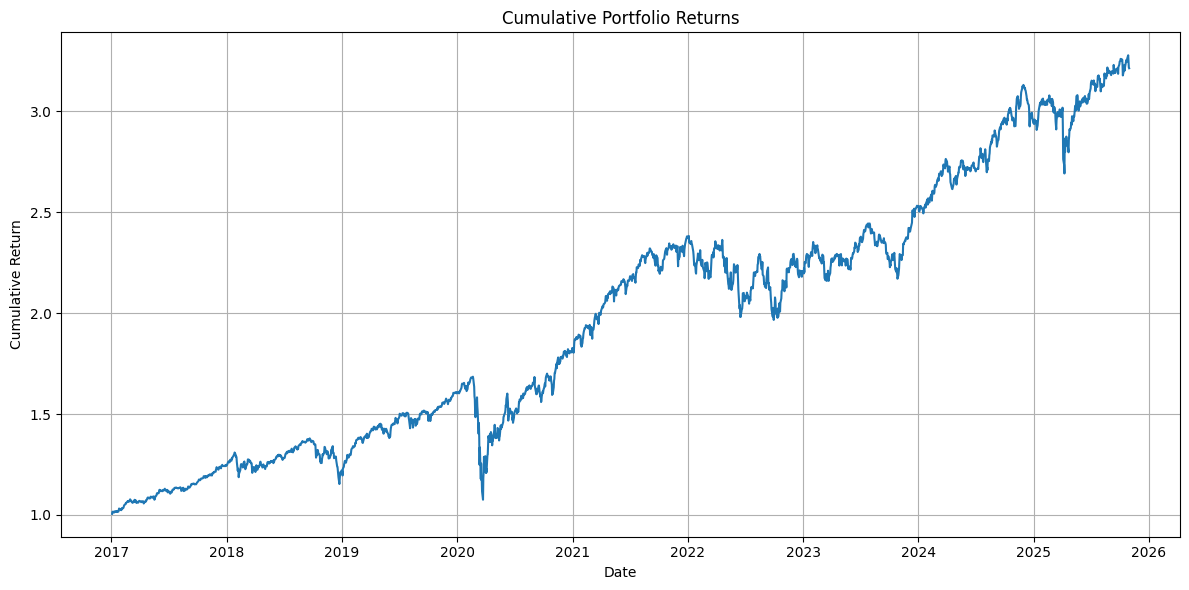

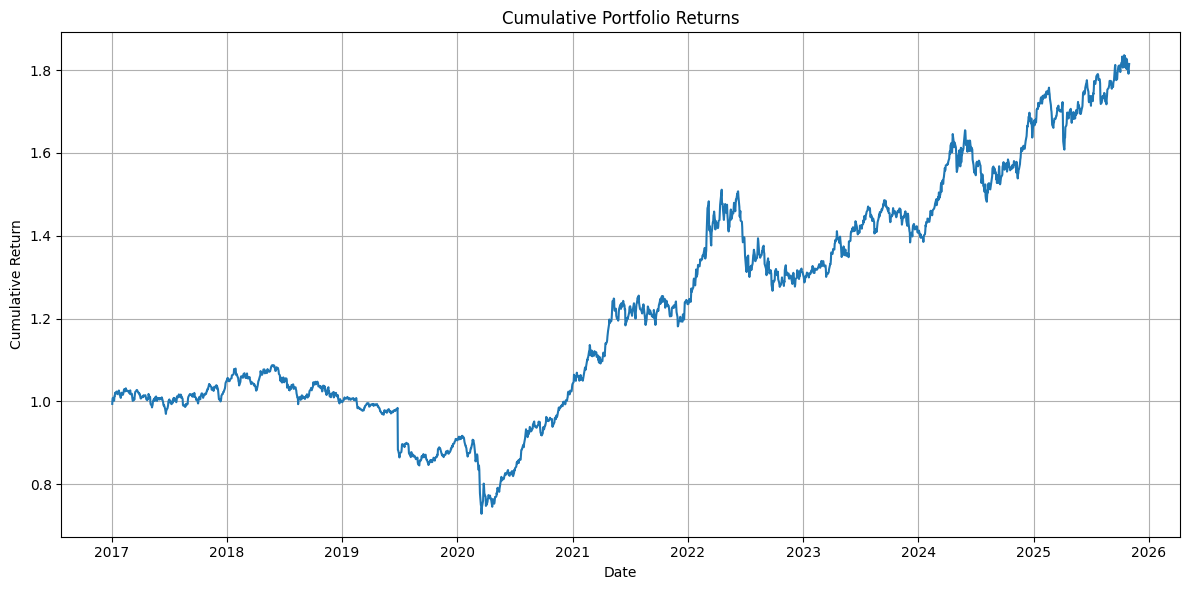

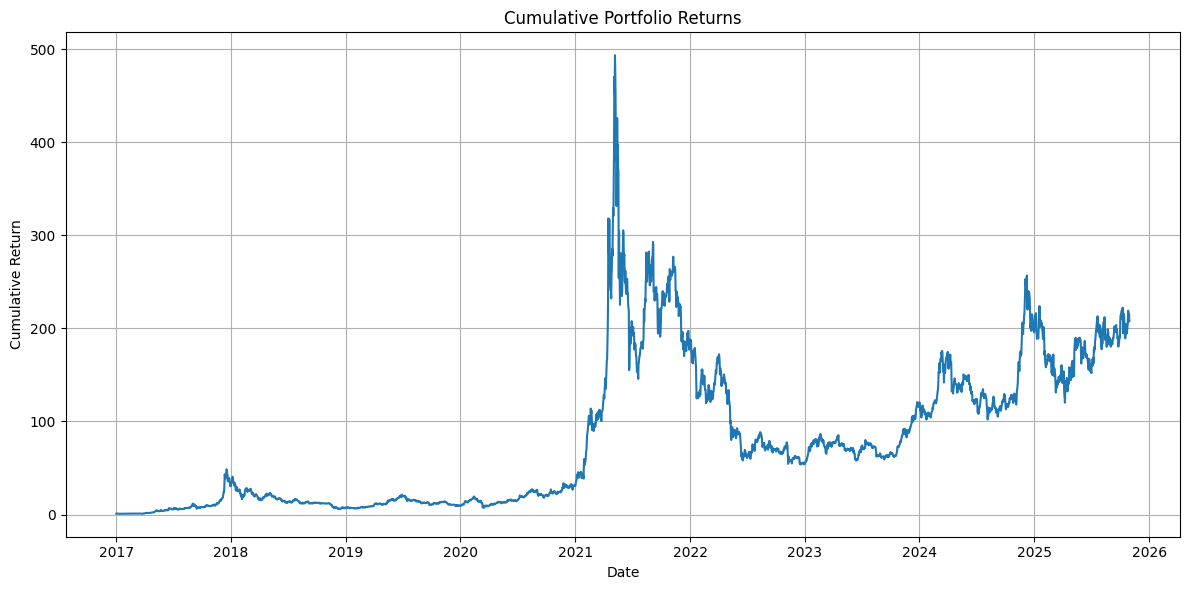

In [104]:
cumu_graph(equity_flat)
cumu_graph(commodity_flat)
cumu_graph(crypto_flat)

# Mean-Variance (in progress)


In [118]:

# --- Step 1: Prepare Data for Optimization ---

# Create a DataFrame to store the annualized mean returns and volatilities
portfolio_stats = pd.DataFrame({
    'Mean Return': [equity_mean, commodity_mean, crypto_mean],
    'Volatility': [equity_vol, commodity_vol, crypto_vol]
}, index=['Equity ERC', 'Commodity ERC', 'Crypto ERC'])

print("Portfolio Statistics:")
print(portfolio_stats)

# To calculate the covariance matrix between these *portfolios*,
equity_flat_renamed = equity_flat.rename(columns={'Daily Returns': 'Equity Returns'})
commodity_flat_renamed = commodity_flat.rename(columns={'Daily Returns': 'Commodity Returns'})
crypto_flat_renamed = crypto_flat.rename(columns={'Daily Returns': 'Crypto Returns'})

# Join them on their index (date) and drop rows with any NaN values
combined_returns = pd.concat([equity_flat_renamed, commodity_flat_renamed, crypto_flat_renamed], axis=1).dropna()
combined_returns.index = pd.to_datetime(combined_returns.index) # Ensure datetime index

# Calculate the annualized covariance matrix of these three ERC portfolios
annualized_cov_matrix = combined_returns.cov() * 252

# The 'means' for the optimization are the annualized means:
asset_means = portfolio_stats['Mean Return'].values

# --- Step 2: Define Risk Aversion Coefficient ---  (will be decided by quizz)
risk_aversion_coefficient = 10.0
print(f"\nUsing Risk Aversion Coefficient (A): {risk_aversion_coefficient}")

# --- Step 3: Define Optimization Functions (Utility Maximization) ---

def portfolio_return(weights, means):
    """Calculates the portfolio return."""
    return np.dot(weights, means)

def portfolio_volatility(weights, cov_matrix):
    """Calculates the portfolio volatility."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def negative_utility_function(weights, means, cov_matrix, risk_aversion_coeff):
    """
    Calculates the negative of the utility function to be minimized..
    """
    p_return = portfolio_return(weights, means)
    p_volatility = portfolio_volatility(weights, cov_matrix)
    p_variance = p_volatility**2

    utility = p_return - 0.5 * risk_aversion_coeff * p_variance
    return -utility

# --- Step 4: Perform Utility Maximization Optimization ---

num_assets = len(asset_means)
initial_weights = np.array([1/num_assets] * num_assets)

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights between 0 and 1 (no short selling)
bounds = tuple((0, 1) for _ in range(num_assets))

# Optimization
optimization_result_utility = minimize(
    negative_utility_function,
    initial_weights,
    args=(asset_means, annualized_cov_matrix, risk_aversion_coefficient),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints,
    tol=1e-6 # Set a tolerance for convergence
)

optimal_weights_utility = optimization_result_utility.x

# --- Step 5: Display Optimal Portfolio Results ---

optimal_portfolio_return_utility = portfolio_return(optimal_weights_utility, asset_means)
optimal_portfolio_volatility_utility = portfolio_volatility(optimal_weights_utility, annualized_cov_matrix)


print("\n--- Mean-Variance Optimization Results (with Risk Aversion) ---")
print("Optimal Weights:")
for i, asset_name in enumerate(portfolio_stats.index):
    print(f"  {asset_name}: {optimal_weights_utility[i]:.4f}")

print(f"\nOptimal Portfolio Annualized Return: {optimal_portfolio_return_utility:.4f}")
print(f"Optimal Portfolio Annualized Volatility: {optimal_portfolio_volatility_utility:.4f}")

Portfolio Statistics:
               Mean Return  Volatility
Equity ERC        0.146826    0.168788
Commodity ERC     0.074470    0.117021
Crypto ERC        0.686000    0.733579

Using Risk Aversion Coefficient (A): 10.0

--- Mean-Variance Optimization Results (with Risk Aversion) ---
Optimal Weights:
  Equity ERC: 0.4168
  Commodity ERC: 0.4995
  Crypto ERC: 0.0837

Optimal Portfolio Annualized Return: 0.1558
Optimal Portfolio Annualized Volatility: 0.1346
